In [25]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, GRU
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
(train_input, train_target), (test_input, test_target) = \
    imdb.load_data(num_words=500)

train_input, val_input, train_target, val_target = \
    train_test_split(train_input, train_target, test_size=0.2, random_state=1234)

print(train_input.shape, train_target.shape)
print(val_input.shape, val_target.shape)
print(test_input.shape, test_target.shape)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\Joshua Jinseok Kim\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


(20000,) (20000,)
(5000,) (5000,)
(25000,) (25000,)


C:\Users\Joshua Jinseok Kim\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

print(train_seq.shape, val_seq.shape)

(20000, 100) (5000, 100)


In [6]:
model = Sequential()
model.add(Embedding(500, 16, input_length=100))
model.add(LSTM(8))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [10]:
rmsprop = RMSprop(learning_rate=1e-4)

model.compile(
    optimizer=rmsprop,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

checkpoint_cb = ModelCheckpoint('best-lstm-model.h5')
earlystopping_cb = EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(
    train_seq,
    train_target,
    epochs=50,
    batch_size=64,
    validation_data=(val_seq, val_target),
    callbacks=[checkpoint_cb, earlystopping_cb]
)

Epoch 1/50
313/313 [==============================] - 13s 34ms/step - loss: 0.6930 - accuracy: 0.5077 - val_loss: 0.6924 - val_accuracy: 0.5454
Epoch 2/50
313/313 [==============================] - 8s 27ms/step - loss: 0.6921 - accuracy: 0.5656 - val_loss: 0.6910 - val_accuracy: 0.5772
Epoch 3/50
313/313 [==============================] - 9s 28ms/step - loss: 0.6903 - accuracy: 0.5946 - val_loss: 0.6878 - val_accuracy: 0.5898
Epoch 4/50
313/313 [==============================] - 9s 27ms/step - loss: 0.6855 - accuracy: 0.5931 - val_loss: 0.6787 - val_accuracy: 0.6218
Epoch 5/50
313/313 [==============================] - 9s 27ms/step - loss: 0.6702 - accuracy: 0.6296 - val_loss: 0.6334 - val_accuracy: 0.7164
Epoch 6/50
313/313 [==============================] - 9s 27ms/step - loss: 0.6180 - accuracy: 0.7196 - val_loss: 0.5983 - val_accuracy: 0.7332
Epoch 7/50
313/313 [==============================] - 9s 28ms/step - loss: 0.5891 - accuracy: 0.7443 - val_loss: 0.5827 - val_accuracy: 0.738

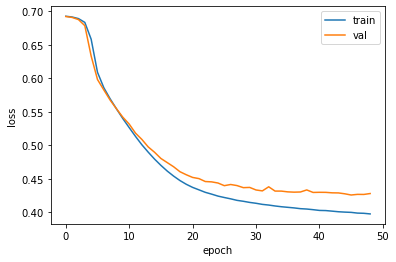

''

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

plt.show()
;

In [14]:
model = Sequential()
model.add(Embedding(500, 16, input_length=100))
model.add(LSTM(8, dropout=0.3))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [15]:
rmsprop = RMSprop(learning_rate=1e-4)

model.compile(
    optimizer=rmsprop,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

checkpoint_cb = ModelCheckpoint('best-lstm-model.h5')
earlystopping_cb = EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(
    train_seq,
    train_target,
    epochs=50,
    batch_size=64,
    validation_data=(val_seq, val_target),
    callbacks=[checkpoint_cb, earlystopping_cb]
)

Epoch 1/50
313/313 [==============================] - 12s 30ms/step - loss: 0.6926 - accuracy: 0.5222 - val_loss: 0.6906 - val_accuracy: 0.5872
Epoch 2/50
313/313 [==============================] - 8s 27ms/step - loss: 0.6893 - accuracy: 0.6006 - val_loss: 0.6838 - val_accuracy: 0.6430
Epoch 3/50
313/313 [==============================] - 8s 26ms/step - loss: 0.6789 - accuracy: 0.6503 - val_loss: 0.6503 - val_accuracy: 0.7002
Epoch 4/50
313/313 [==============================] - 8s 26ms/step - loss: 0.6257 - accuracy: 0.7112 - val_loss: 0.5861 - val_accuracy: 0.7146
Epoch 5/50
313/313 [==============================] - 8s 27ms/step - loss: 0.5793 - accuracy: 0.7239 - val_loss: 0.5634 - val_accuracy: 0.7282
Epoch 6/50
313/313 [==============================] - 9s 27ms/step - loss: 0.5550 - accuracy: 0.7401 - val_loss: 0.5435 - val_accuracy: 0.7430
Epoch 7/50
313/313 [==============================] - 8s 27ms/step - loss: 0.5354 - accuracy: 0.7528 - val_loss: 0.5256 - val_accuracy: 0.754

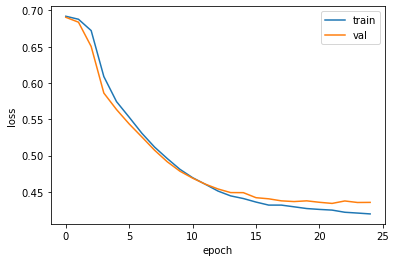

''

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

plt.show()
;

In [17]:
model = Sequential()
model.add(Embedding(500, 16, input_length=100))
model.add(LSTM(8, dropout=0.3, return_sequences=True))
model.add(LSTM(8, dropout=0.3))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [18]:
rmsprop = RMSprop(learning_rate=1e-4)

model.compile(
    optimizer=rmsprop,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

checkpoint_cb = ModelCheckpoint('best-lstm-model.h5')
earlystopping_cb = EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(
    train_seq,
    train_target,
    epochs=50,
    batch_size=64,
    validation_data=(val_seq, val_target),
    callbacks=[checkpoint_cb, earlystopping_cb]
)

Epoch 1/50
313/313 [==============================] - 22s 55ms/step - loss: 0.6928 - accuracy: 0.5215 - val_loss: 0.6912 - val_accuracy: 0.6010
Epoch 2/50
313/313 [==============================] - 16s 53ms/step - loss: 0.6892 - accuracy: 0.6061 - val_loss: 0.6764 - val_accuracy: 0.6468
Epoch 3/50
313/313 [==============================] - 17s 53ms/step - loss: 0.6623 - accuracy: 0.6732 - val_loss: 0.6088 - val_accuracy: 0.7182
Epoch 4/50
313/313 [==============================] - 17s 54ms/step - loss: 0.5926 - accuracy: 0.7182 - val_loss: 0.5573 - val_accuracy: 0.7374
Epoch 5/50
313/313 [==============================] - 17s 54ms/step - loss: 0.5527 - accuracy: 0.7375 - val_loss: 0.5330 - val_accuracy: 0.7504
Epoch 6/50
313/313 [==============================] - 17s 54ms/step - loss: 0.5253 - accuracy: 0.7606 - val_loss: 0.5131 - val_accuracy: 0.7566
Epoch 7/50
313/313 [==============================] - 17s 55ms/step - loss: 0.5094 - accuracy: 0.7639 - val_loss: 0.4994 - val_accuracy:

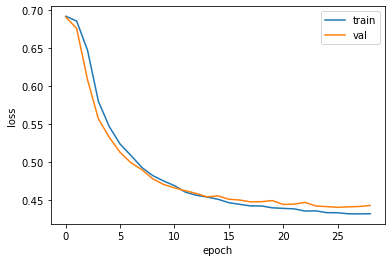

''

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

plt.show()
;

In [22]:
model = Sequential()
model.add(Embedding(500, 16, input_length=100))
model.add(GRU(8))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
gru (GRU)                    (None, 8)                 624       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [23]:
rmsprop = RMSprop(learning_rate=1e-4)

model.compile(
    optimizer=rmsprop,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

checkpoint_cb = ModelCheckpoint('best-lstm-model.h5')
earlystopping_cb = EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(
    train_seq,
    train_target,
    epochs=50,
    batch_size=64,
    validation_data=(val_seq, val_target),
    callbacks=[checkpoint_cb, earlystopping_cb]
)

Epoch 1/50
313/313 [==============================] - 13s 34ms/step - loss: 0.6930 - accuracy: 0.5098 - val_loss: 0.6921 - val_accuracy: 0.5488
Epoch 2/50
313/313 [==============================] - 10s 32ms/step - loss: 0.6916 - accuracy: 0.5665 - val_loss: 0.6904 - val_accuracy: 0.5660
Epoch 3/50
313/313 [==============================] - 10s 32ms/step - loss: 0.6893 - accuracy: 0.5880 - val_loss: 0.6877 - val_accuracy: 0.5762
Epoch 4/50
313/313 [==============================] - 10s 32ms/step - loss: 0.6859 - accuracy: 0.6014 - val_loss: 0.6832 - val_accuracy: 0.5934
Epoch 5/50
313/313 [==============================] - 10s 32ms/step - loss: 0.6800 - accuracy: 0.6124 - val_loss: 0.6760 - val_accuracy: 0.6060
Epoch 6/50
313/313 [==============================] - 10s 32ms/step - loss: 0.6708 - accuracy: 0.6274 - val_loss: 0.6642 - val_accuracy: 0.6238
Epoch 7/50
313/313 [==============================] - 11s 35ms/step - loss: 0.6562 - accuracy: 0.6454 - val_loss: 0.6450 - val_accuracy:

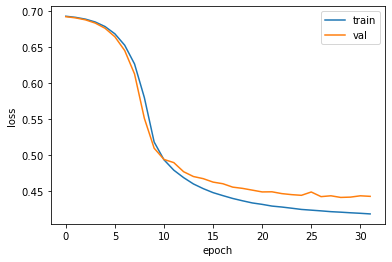

''

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

plt.show()
;

In [26]:
test_seq = pad_sequences(test_input, maxlen=100)

model_best = load_model('best-lstm-model.h5')
model_best.evaluate(test_seq, test_target)

782/782 [==============================] - 4s 5ms/step - loss: 0.4390 - accuracy: 0.7971


[0.4390192925930023, 0.7971199750900269]